In [28]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import csv 
%matplotlib inline

In [29]:
ds = pd.read_csv("covid-variants.csv")
ds.head()


,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [30]:
ds.tail()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6
100415,Zimbabwe,2021-11-01,non_who,0,0.0,6


In [31]:
ds.dtypes

location                object
date                    object
variant                 object
num_sequences            int64
perc_sequences         float64
num_sequences_total      int64
dtype: object

In [32]:
ds.count()

location               100416
date                   100416
variant                100416
num_sequences          100416
perc_sequences         100416
num_sequences_total    100416
dtype: int64

In [33]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [34]:
print(set(ds["variant"]))

{'Epsilon', 'non_who', 'Kappa', 'B.1.258', 'B.1.1.519', 'B.1.160', 'Eta', 'Beta', 'Gamma', 'Alpha', 'B.1.620', 'B.1.1.277', 'B.1.367', 'B.1.177', 'B.1.221', 'Delta', 'Mu', 'Lambda', 'Iota', 'S:677H.Robin1', 'S:677P.Pelican', 'others', 'B.1.1.302', 'Omicron'}


In [36]:
ds.groupby("num_sequences_total")
ds["variant"].value_counts()

Alpha             4184
B.1.1.277         4184
others            4184
S:677P.Pelican    4184
S:677H.Robin1     4184
Omicron           4184
Mu                4184
Lambda            4184
Kappa             4184
Iota              4184
Gamma             4184
Eta               4184
Epsilon           4184
Delta             4184
Beta              4184
B.1.620           4184
B.1.367           4184
B.1.258           4184
B.1.221           4184
B.1.177           4184
B.1.160           4184
B.1.1.519         4184
B.1.1.302         4184
non_who           4184
Name: variant, dtype: int64

In [45]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
num_sequences,100416.0,72.171676,1669.262169,0.00,0.0,0.0,0.0,142280.0
perc_sequences,100416.0,6.154355,21.898989,-0.01,0.0,0.0,0.0,100.0
num_sequences_total,100416.0,1509.582457,8445.291772,1.00,12.0,59.0,394.0,146170.0


In [46]:
duplicate = ds.duplicated()
print(duplicate.sum())

0


In [59]:
ds.loc[ds["num_sequences_total"].idxmax()]

location               United States
date                      2021-08-09
variant                        Alpha
num_sequences                   1127
perc_sequences                  0.77
num_sequences_total           146170
Name: 97560, dtype: object

In [60]:
ds.corr()

,num_sequences,perc_sequences,num_sequences_total
num_sequences,1.000000,0.147368,0.219677
perc_sequences,0.147368,1.000000,-0.011211
num_sequences_total,0.219677,-0.011211,1.000000


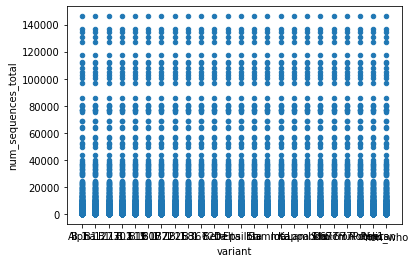

In [62]:
ds.plot(kind = 'scatter', x = 'variant', y = 'num_sequences_total')